In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from CustomDataset import EmoSet
from torchvision import models
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data_root = r'D:\EmoSet-118K'
num_emotion_classes = 6

# test_dataset = EmoSet(
#     data_root=data_root,
#     num_emotion_classes=num_emotion_classes,
#     phase='test',
# )
# Data store loaded successfully. Total samples: 14081

In [3]:
# train_dataset = EmoSet(
#     data_root=data_root,
#     num_emotion_classes=num_emotion_classes,
#     phase = 'train'
# )
# Data store loaded successfully. Total samples: 75228

In [4]:
# val_dataset = EmoSet(
#     data_root = data_root,
#     num_emotion_classes=num_emotion_classes,
#     phase = 'val'
# )
# Data store loaded successfully. Total samples: 4674

In [5]:
train_dataset = torch.load("train_dataset_72x72.pth")
val_dataset = torch.load("val_dataset_72x72.pth")
test_dataset = torch.load("test_dataset_72x72.pth")

C:\Users\adwik\AppData\Local\Temp\ipykernel_18264\3649822620.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_dataset = torch.load("train_dataset_72x72.pth")
C:\Use

In [6]:
# from tqdm import tqdm

# # Define a transform to resize images to 72×72
# resize_transform = transforms.Compose([
#     transforms.Resize((72, 72))  # Resize to 72×72
# ])

# # Function to resize dataset
# def resize_dataset(dataset, transform):
#     resized_data = []
#     for item in tqdm(dataset, desc="Resizing dataset"):
#         image = item['image']  # Get the image
#         resized_image = transform(image)  # Apply resizing
        
#         # Update the item with resized image and keep all other attributes intact
#         resized_item = {
#             'image': resized_image,
#             'emotion_label_idx': item['emotion_label_idx'],
#             'scene_label_idx': item['scene_label_idx'],
#             'facial_expression_label_idx': item['facial_expression_label_idx'],
#             'human_action_label_idx': item['human_action_label_idx'],
#             'brightness_label_idx': item['brightness_label_idx'],
#             'colorfulness_label_idx': item['colorfulness_label_idx'],
#             'object_label_idx': item['object_label_idx'],
#         }
#         resized_data.append(resized_item)
#     return resized_data

# # Load your datasets
# train_dataset = torch.load("train_dataset.pth")
# val_dataset = torch.load("val_dataset.pth")
# test_dataset = torch.load("test_dataset.pth")

# # Resize train, val, and test datasets
# print("Resizing train dataset...")
# train_dataset_72_72 = resize_dataset(train_dataset, resize_transform)
# torch.save(train_dataset_72_72, "train_dataset_72x72.pth")

# print("Resizing val dataset...")
# val_dataset_72_72 = resize_dataset(val_dataset, resize_transform)
# torch.save(val_dataset_72_72, "val_dataset_72x72.pth")

# print("Resizing test dataset...")
# test_dataset_72_72 = resize_dataset(test_dataset, resize_transform)
# torch.save(test_dataset_72_72, "test_dataset_72x72.pth")

# print("All datasets resized and saved.")


In [7]:
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

In [ ]:
for batch in test_loader:
    print(batch['image'][0].shape)  # Assuming batch[0] contains the input data
    break


torch.Size([3, 72, 72])


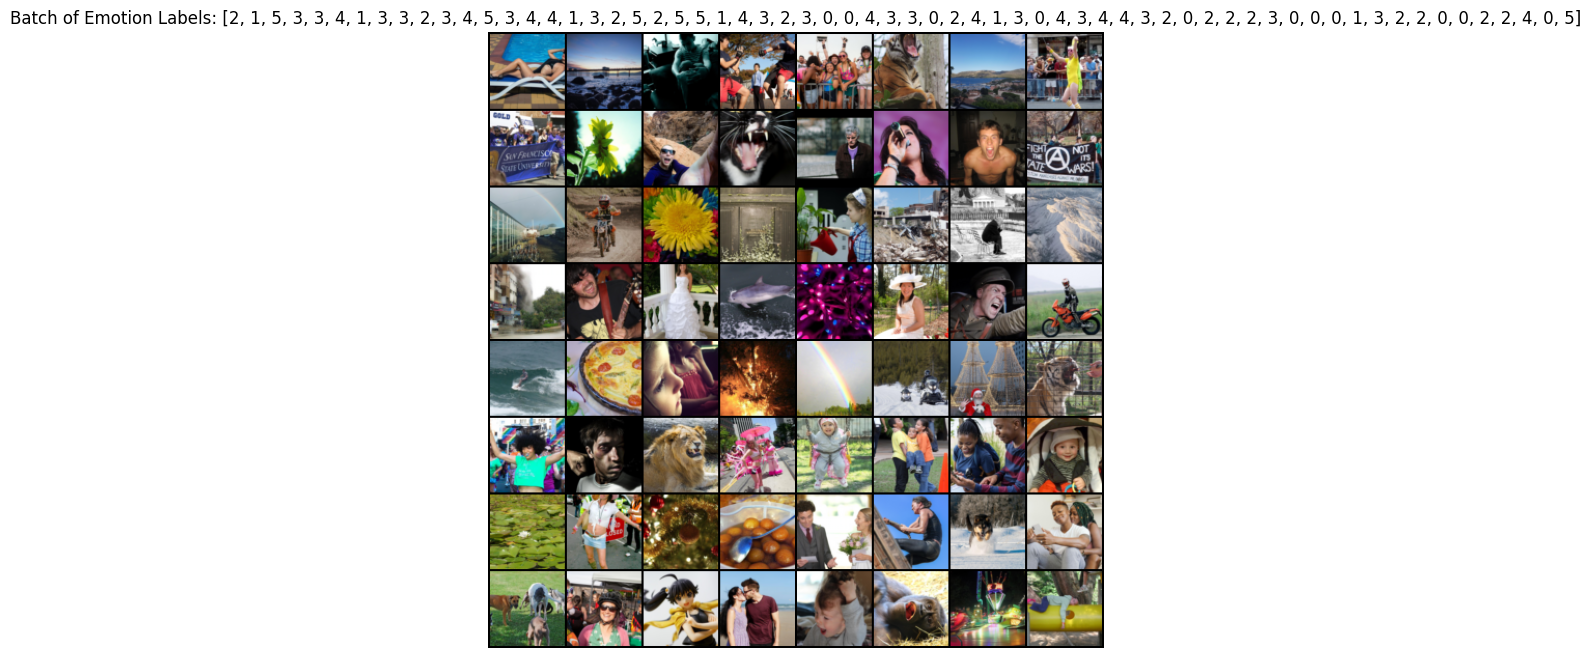

In [9]:
import matplotlib.pyplot as plt
import torchvision

# Function to display a batch of images
def show_images_batch(images, labels, label_name="Emotion"):
    # Unnormalize the images for display
    unnormalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    images = torch.stack([unnormalize(img) for img in images])  # Unnormalize all images
    images = images.clamp(0, 1)  # Clamp the values to [0, 1] for display

    # Create a grid of images
    grid = torchvision.utils.make_grid(images, nrow=8)
    plt.figure(figsize=(16, 8))
    plt.imshow(grid.permute(1, 2, 0))  # Convert from CHW to HWC for display
    plt.axis('off')
    plt.title(f"Batch of {label_name} Labels: {labels.tolist()}")
    plt.show()

# Display a batch from the test_loader
for batch in test_loader:
    images = batch['image']  # Get images
    labels = batch['emotion_label_idx']  # Get emotion labels
    show_images_batch(images, labels, label_name="Emotion")
    break  # Display only the first batch


In [10]:
# for i, data in enumerate(dataloader):
#     print(data['image'])
#     print(data['emotion_label_idx'])
#     print(data['scene_label_idx'])
#     print(data['facial_expression_label_idx'])
#     print(data['human_action_label_idx'])
#     print(data['brightness_label_idx'])
#     print(data['colorfulness_label_idx'])
#     print(data['object_label_idx'])
#     break
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load Pretrained ResNet-50
model = models.resnet50(pretrained=True)

# # Step 2: Modify the Fully Connected (FC) Layer
# # Assuming `num_emotion_classes` is the number of classes in your dataset
# num_emotion_classes = 6  # Change as per your dataset
# model.fc = nn.Linear(model.fc.in_features, num_emotion_classes)

# # Move the model to the appropriate device
# model = model.to(device)

C:\Users\adwik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\adwik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
# # Step 2: Freeze all pre-trained layers
# for param in model.parameters():
#     param.requires_grad = False

# # Unfreeze specific layers for fine-tuning
# for name, param in model.named_parameters():
#     if "layer4" in name or "fc" in name:  # Fine-tune final layers
#         param.requires_grad = True

# Step 3: Modify the Fully Connected (FC) Layer and add more layers
# Assuming `num_emotion_classes` is the number of classes in your dataset
num_emotion_classes = 6  # Change as per your dataset
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 256),  # First additional layer
    nn.BatchNorm1d(256),                   # Batch Normalization
    nn.ReLU(),                             # Activation function
    nn.Dropout(0.3),                       # Dropout for regularization

    nn.Linear(256, 512),                   # Second additional layer
    nn.BatchNorm1d(512),                   # Batch Normalization
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(512, 256),                   # Third additional layer
    nn.BatchNorm1d(256),                   # Batch Normalization
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(256, num_emotion_classes)    # Final classification layer
)

# Move the model to the appropriate device
model = model.to(device)

# Step 4: Define the optimizer and loss function
optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),  # Optimize only trainable parameters
    lr=0.0005
)
criterion = nn.CrossEntropyLoss()

# Step 5: Print the updated model architecture
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=12):
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")

        # Training Phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        for batch in train_loader:
            images = batch['image'].to(device)
            labels = batch['emotion_label_idx'].to(device)

            # Forward pass
            outputs = model(images)
            print(outputs[0])  
            print(labels[0])
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track loss and accuracy
            train_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss = train_loss / len(train_loader.dataset)
        train_accuracy = train_correct.double() / len(train_loader.dataset)

        # Validation Phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        with torch.no_grad():
            for batch in val_loader:
                images = batch['image'].to(device)
                labels = batch['emotion_label_idx'].to(device)

                # Forward pass
                outputs = model(images)
                loss = criterion(outputs, labels)

                # Track loss and accuracy
                val_loss += loss.item() * images.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = val_correct.double() / len(val_loader.dataset)

        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

In [26]:
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=12)

Epoch 1/12
tensor([-1.3437,  6.1707,  1.7897,  1.4390, -3.3569, -1.7263],
       grad_fn=<SelectBackward0>)
tensor(1)
tensor([ 1.5854, -3.2238, -1.2841,  1.1426,  3.2578, -1.3601],
       grad_fn=<SelectBackward0>)
tensor(0)


KeyboardInterrupt: 

In [14]:
def test_model(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    test_correct = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch in test_loader:
            images = batch['image'].to(device)
            labels = batch['emotion_label_idx'].to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Track loss
            test_loss += loss.item() * images.size(0)

            # Predictions
            _, preds = torch.max(outputs, 1)
            test_correct += torch.sum(preds == labels.data)

            # Store labels and predictions for metrics
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # Calculate overall loss and accuracy
    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = test_correct.double() / len(test_loader.dataset)

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Generate classification report and confusion matrix
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=[f'Class {i}' for i in range(num_emotion_classes)]))

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))

In [38]:
test_model(model, test_loader, criterion)

Test Loss: 0.9523
Test Accuracy: 0.6410

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.64      0.58      0.61      2770
     Class 1       0.78      0.69      0.73      2260
     Class 2       0.50      0.55      0.52      2484
     Class 3       0.64      0.74      0.69      3014
     Class 4       0.79      0.59      0.67      1708
     Class 5       0.62      0.69      0.65      1845

    accuracy                           0.64     14081
   macro avg       0.66      0.64      0.64     14081
weighted avg       0.65      0.64      0.64     14081


Confusion Matrix:
[[1604   56  469  512   41   88]
 [ 136 1553  294  136   27  114]
 [ 369  181 1362  291   36  245]
 [ 298   95  199 2238   96   88]
 [  49   36  182  204 1001  236]
 [  68   81  239  129   60 1268]]


In [12]:
# # Step 6: Save the Fine-Tuned Model
# torch.save(model.state_dict(), "resnet50_finetune_64.pth")
# print("Model saved successfully.")
model.load_state_dict(torch.load(r"D:\SoulSync\resnet50_finetune_64.pth", map_location=device, weights_only=True))

<All keys matched successfully>

In [15]:
test_model(model, test_loader, criterion)

KeyboardInterrupt: 

In [21]:
model.to(device)  # Move the model to the appropriate device (CPU/GPU)
model.eval()  # Set the model to evaluation mode

# Take a random batch from the test_loader
# Assuming `test_loader` is already defined as a DataLoader object
random_batch = next(iter(test_loader))  # Get a random batch from the test_loader

# Move the batch to the appropriate device
images = random_batch['image'].to(device)
labels = random_batch['emotion_label_idx'].to(device)

# Forward pass (no gradients needed for evaluation)
with torch.no_grad():
    outputs = model(images)  # Get the model's predictions (raw logits)

# Convert logits to predicted class indices
_, preds = torch.max(outputs, 1)  # preds contains the predicted class indices

# Print the predicted class and actual label for the first image in the batch
print(f"Predicted class: {preds[0].item()}, Actual label: {labels[0].item()}")

Predicted class: 3, Actual label: 3
